# P03: Simulation of Multivariate Data and Plotting Confidence Regions

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from random import seed
from random import gauss
from scipy.stats import norm, chi2

Generate two (or more) n random normal observations (X) with mean zero and std 1 -
Perform Cholesky decomposition of the given co-variance matrix (Σ and take the lower triangular
matrix L from that. (LLT = Σ) - Pre-multiply the L with X. Now, this X will have the mean
0 and co-variace Σ. - To move the observations with centre at the given mean µ, add the outer
product of the one vector (1, . . . , 1)n×1 and µ. - Now, the mean of X will µ (approx)

In [95]:
def generate_corrected_data(num_samples,mu,cov_mat):
    init_x = norm.rvs(size=(len(cov_mat),num_samples),random_state=101)
    C = la.cholesky(cov_mat,lower= True) #decomposition of cov_mat.
    X = np.dot(C,init_x)
    X = X + np.outer(np.ones(num_samples),mu).transpose()
    return X

Alternative way of doing, using bulitin function

In [96]:
cov_mat = np.array([[1.1,-1],[-1,1]])
mu = np.array([0,0])
X = np.random.multivariate_normal(mean =[0,0], cov = cov_mat,size=100 ).transpose()
np.corrcoef(X[0],X[1])

array([[ 1.        , -0.95258379],
       [-0.95258379,  1.        ]])

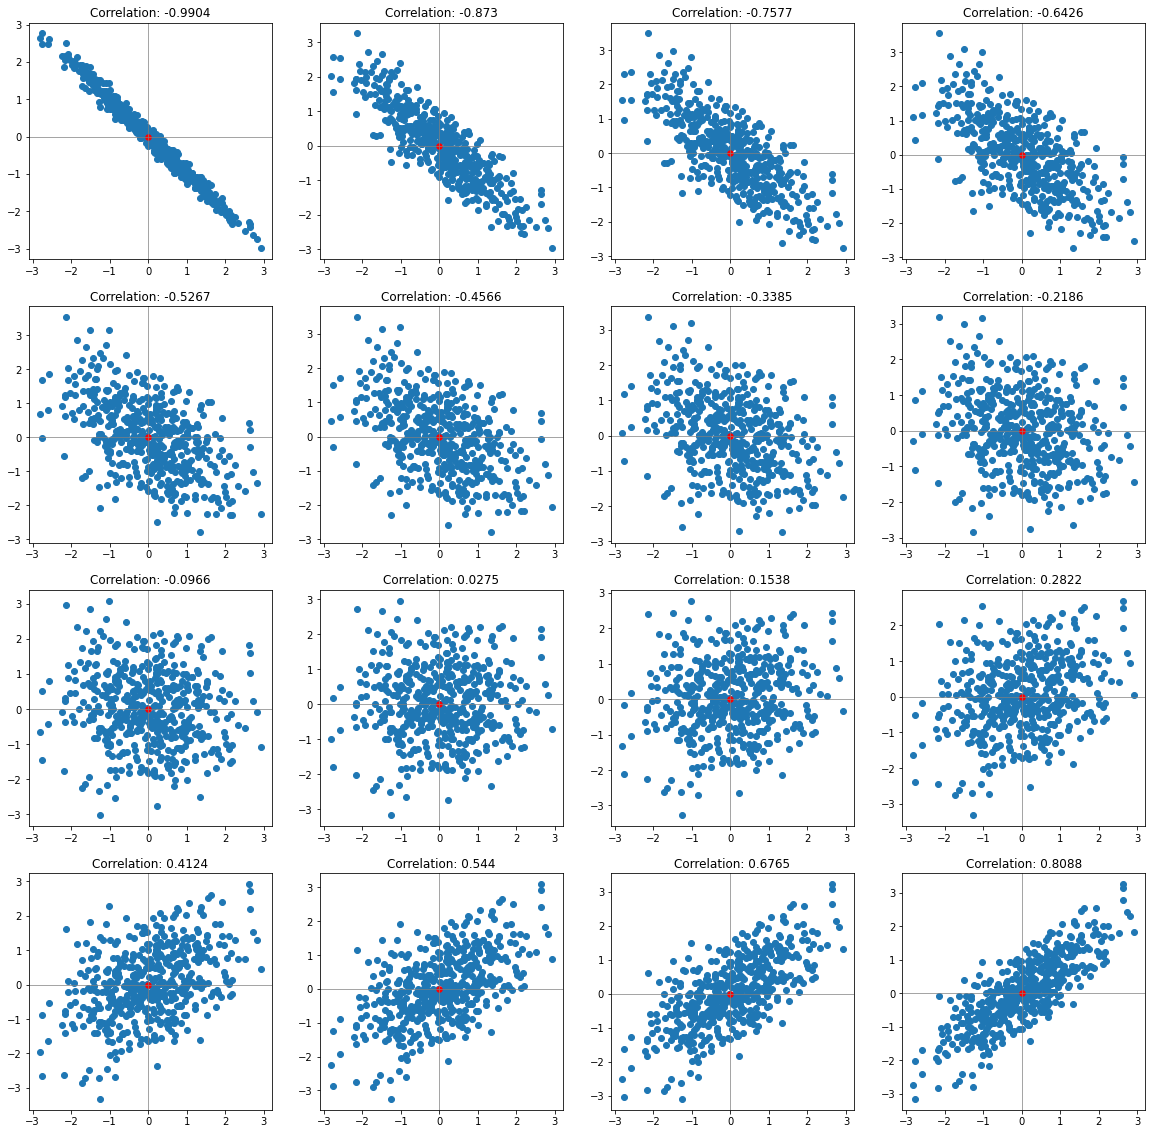

In [97]:
num_samples = 500
mu = [0,0]
rhos_mesh = np.array([-1,-0.875,-0.75,-0.625,-0.5,-0.425,-0.3,-0.175,
                      -0.05,0.075,0.2,0.325,0.45,0.575,0.7,0.825]).reshape(4,4)
nrows,ncols = rhos_mesh.shape
fig, axs = plt.subplots(figsize = (20,20),nrows=nrows, ncols=ncols)
for rhos_row, ax_row in zip(rhos_mesh,axs):
    for rho, ax in zip(rhos_row,ax_row):
        cov_mat = [[1.02,rho],[rho,1]]
        X = generate_corrected_data(num_samples,mu,cov_mat) #function call
        ax.scatter(X[0],X[1])
        ax.scatter(mu[0],mu[1],s=30,c='red') #pointing (0,0) red dot
        ax.axhline(c='grey',lw=.7) #x-axis
        ax.axvline(c='grey',lw=.7) #y-axis
        corr_computed = np.corrcoef(X[0],X[1])[0,1].round(4)
        ax.set_title(f'Correlation: {corr_computed}')
plt.show()


**Plotting Confidence Region**

In [98]:
 from matplotlib.patches import Ellipse

In [99]:
num_samples = 1000
mu = [1,4]
cov_mat = [[1,0.75],[0.75,1]]
X = generate_corrected_data(num_samples,mu,cov_mat)
data = pd.DataFrame(X.transpose())
data.head()

,0,1
0,3.706850,6.461148
1,1.628133,4.421636
2,1.907969,4.426614
3,1.503826,4.667307
4,1.651118,4.151629


In [100]:
def draw_confidence_ellipse(data,alpha,**kwargs):
    dof = len(data.columns)
    c = np.sqrt(chi2.ppf(1-alpha, dof))
    mean_vec = np.array(data.mean())
    cov_matrix = np.array(data.cov())
    # find the eigenvalues and eigenvectors
    eigvals, eigvecs = la.eigh(cov_matrix)
    # sorting based on the descending order of eigenvalues
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    # Width and height of ellipse to draw
    width, height = 2 * c * np.sqrt(eigvals)
    #Angle of the major axis
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    angle = np.degrees(np.arctan2(vy,vx))
    return Ellipse(mean_vec,
                    width = width,
                    height = height,
                    angle = angle,
                    fill = False,
                    label = f"{100*(1-alpha):.0f}%", **kwargs)

**Plotting of Ellipse**

In [101]:
def plot_data_confidence_ellipse(data,ax,alphas = [0.01,0.05,0.1]
                                 ,colors =['red','Blue','Green']):
    ax.scatter(data[0],data[1])
    ax.scatter(data.mean()[0], data.mean()[1], s=100)
    for alpha,color in zip(alphas,colors):
        e = draw_confidence_ellipse(data,alpha=alpha,color=color,lw=2)
        ax.add_patch(e)

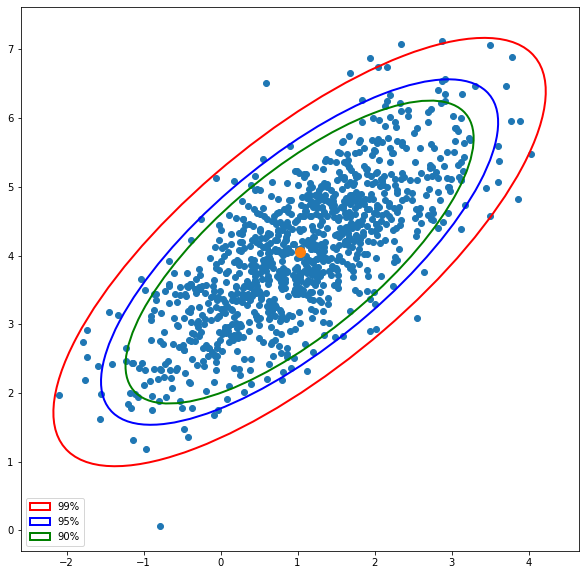

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
plot_data_confidence_ellipse(data=data,ax=ax)
plt.legend()
plt.show()

**Doing All together using function**

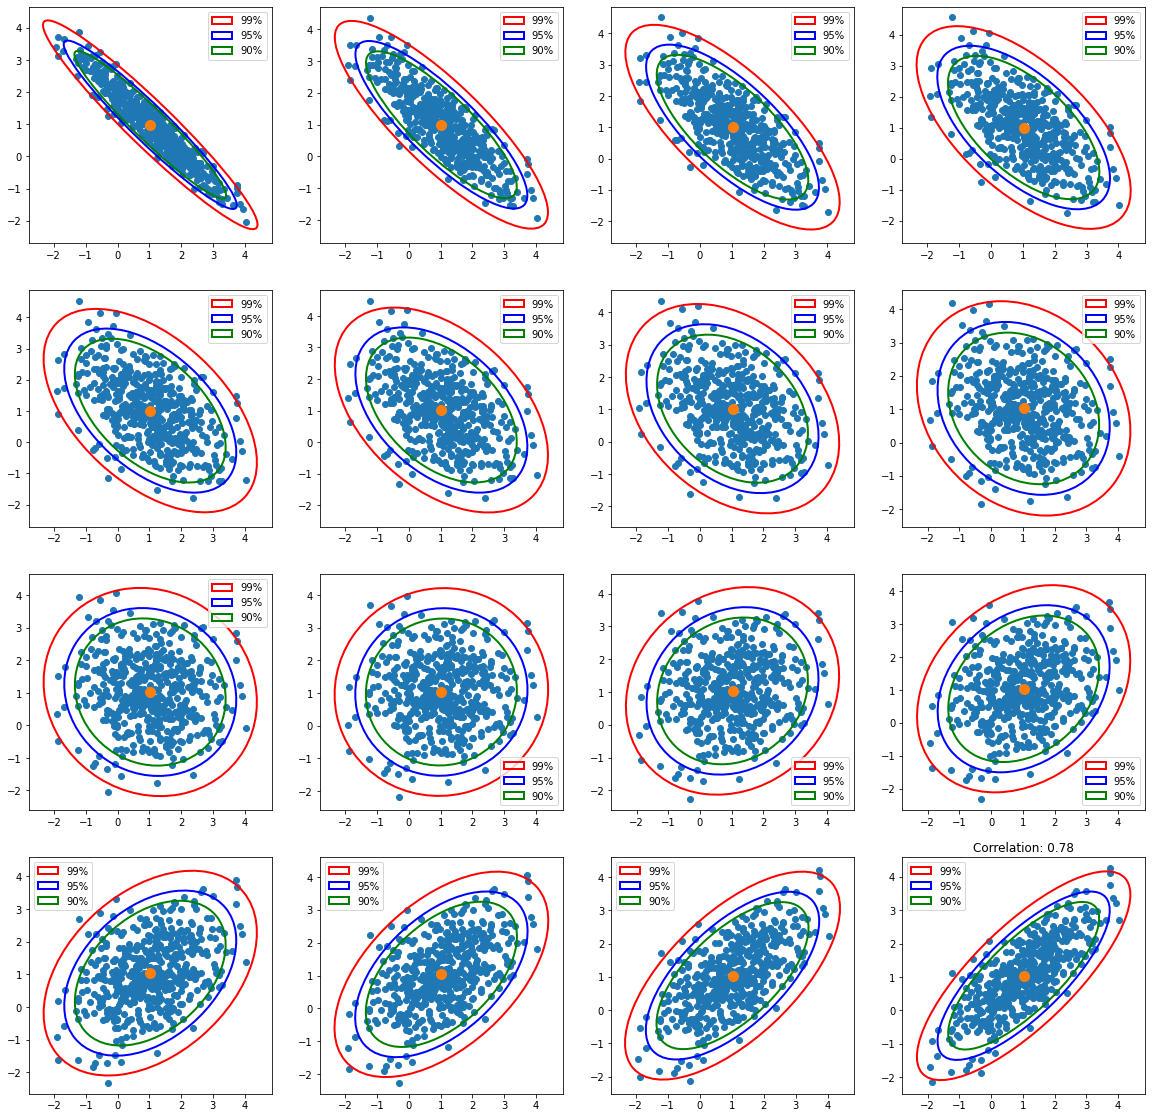

In [103]:
num_samples = 500
mu = [1,1]
rhos_mesh = np.array([-1,-0.875,-0.75,-0.625,-0.5,-0.425,-0.3,-0.175,
                      -0.05,0.075,0.2,0.325,0.45,0.575,0.7,0.825]).reshape(4,4)
nrows,ncols = rhos_mesh.shape
fig, axs = plt.subplots(figsize = (20,20),nrows=nrows, ncols=ncols)
for rhos_row, ax_row in zip(rhos_mesh,axs):
    for rho, ax in zip(rhos_row,ax_row):
        cov_mat = [[1.1,rho],[rho,1]]
        X = generate_corrected_data(num_samples,mu,cov_mat)
        data = pd.DataFrame(X.transpose())
        plot_data_confidence_ellipse(data=data,ax=ax)
        ax.legend()
ax.set_title(f'Correlation: {data.corr()[0][1].round(2)}')
plt.show()

